<a href="https://colab.research.google.com/github/MAFarhannanda19/MAFarhannanda.github.io/blob/main/Gold%20Price%20Prediction%20using%20Machine%20Learning%20with%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gold Price Prediction using Machine Learning with Python**
Created by Muhammad Auzan Farhannanda for exercise machine learning

# **Import Library yang diperlukan**

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# **Download data dari yahoo finance dan melakukan Feature engineering**

In [ ]:

df = yf.download('GC=F', start='2001-01-01', end='2024-10-11', progress=False)

df['Return'] = df['Adj Close'].pct_change() * 100
df['Lagged_Return'] = df.Return.shift(1)
df['SMA_10'] = df['Adj Close'].rolling(window=10).mean()
df['SMA_30'] = df['Adj Close'].rolling(window=30).mean()
df['Volatility'] = df['Adj Close'].rolling(window=10).std()
df = df.dropna()

# **Membagi data train dan menggunakan beberapa fitur baru**

In [ ]:
train = df['2001':'2024']

X_train = train[['Lagged_Return', 'SMA_10', 'SMA_30', 'Volatility']]
y_train = train['Return']

# **Latih model Menggunakan model RandomForestRegressor**

In [ ]:

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# **Melaukan Prediksi untuk 30 hari ke depan (mulai 12 Oktober 2024)**

In [ ]:
future_dates = pd.date_range(start='2024-10-12', periods=30)
future = pd.DataFrame(index=future_dates)

last_data = df.iloc[-1]
future['Lagged_Return'] = last_data['Return']
future['SMA_10'] = last_data['SMA_10']
future['SMA_30'] = last_data['SMA_30']
future['Volatility'] = last_data['Volatility']

In [ ]:

future_predictions = model.predict(future)

predicted_prices = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted Return'])
predicted_prices['Predicted Price'] = df['Adj Close'].iloc[-1] * (1 + predicted_prices['Predicted Return'] / 100).cumprod()

# **Visualisasi prediksi**

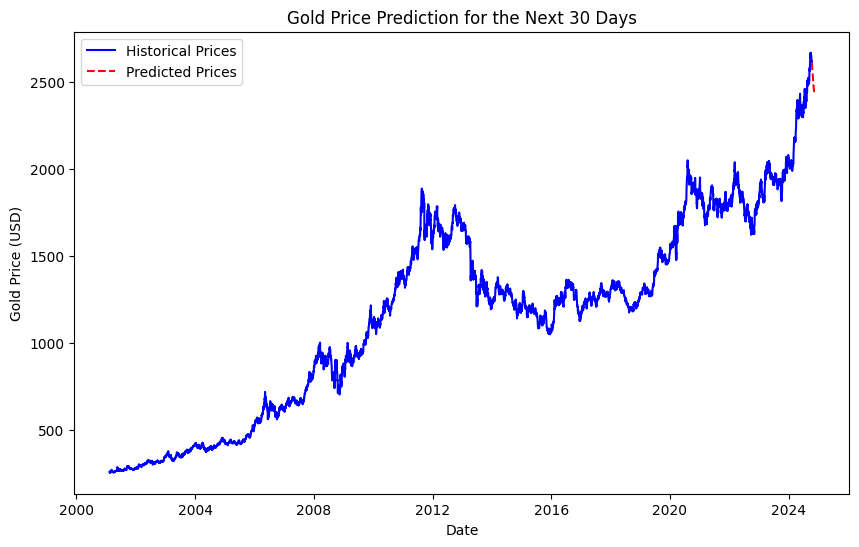

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Adj Close'], label='Historical Prices', color='blue')
plt.plot(predicted_prices.index, predicted_prices['Predicted Price'], label='Predicted Prices', color='red', linestyle='--')
plt.title('Gold Price Prediction for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.legend()
plt.show()


# **Cetak prediksi harga untuk 30 hari ke depan**

In [ ]:

print(predicted_prices)

            Predicted Return  Predicted Price
2024-10-12         -0.246071      2614.151569
2024-10-13         -0.246071      2607.718907
2024-10-14         -0.246071      2601.302075
2024-10-15         -0.246071      2594.901033
2024-10-16         -0.246071      2588.515741
2024-10-17         -0.246071      2582.146163
2024-10-18         -0.246071      2575.792257
2024-10-19         -0.246071      2569.453987
2024-10-20         -0.246071      2563.131314
2024-10-21         -0.246071      2556.824198
2024-10-22         -0.246071      2550.532603
2024-10-23         -0.246071      2544.256490
2024-10-24         -0.246071      2537.995820
2024-10-25         -0.246071      2531.750555
2024-10-26         -0.246071      2525.520659
2024-10-27         -0.246071      2519.306093
2024-10-28         -0.246071      2513.106818
2024-10-29         -0.246071      2506.922799
2024-10-30         -0.246071      2500.753996
2024-10-31         -0.246071      2494.600373
2024-11-01         -0.246071      